# Анализ успешности компьютерной игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Есть данные до 2016 года. Планируется кампания на 2017-й. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр c 1994 года.
Возрастной рейтинг:
    + «EC» («Early childhood») — «Для детей младшего возраста»
    + «E» («Everyone») — «Для всех»
    + «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
    + «T» («Teen») — «Подросткам 13—19 лет»
    + «M» («Mature») — «От 17 лет»
    + «AO» («Adults Only 18+»
    + «RP» ( «Rating Pending»») — «Рейтинг ожидается»:

План работы:

## Предобработка данных:
- [х] Загрузить таблицу. Предварительный анализ таблицы. Наличие пропусков. Соответствие типов данных в значениях столбца
- [х] Замените названия столбцов (приведите к нижнему регистру)
- [x] Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему
- [x] Обработать пропуски
- [x] Найти пропуски. Объяснить, почему заполнили именно так, каковы причины пропусков
- [x] Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец
## Исследовательский анализ:
- [x] Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Взять данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год (не учитывать в работе данные за предыдущие годы)
- [x] Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ
- [x] Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат
- [x] Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
## Сформулировать выводы:
- [x] Соотнести выводы с продажами игр на других платформах
- [x] Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
## Составьте портрет пользователя каждого региона
- [x] Определить для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5). Описать различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Пояснить разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?
## Проверка гипотезы:
- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. Задать самостоятельно пороговое значение alpha.
- [x] Как сформулировал нулевую и альтернативную гипотезы?
- [X] Какой критерий применили для проверки гипотез и почему?
## Общий вывод

In [83]:
import pandas as pd # Библиотека  Pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


In [84]:
data=pd.read_csv('games.csv') # Читаю csv-файл 

In [85]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет состоит из 11 столбцов и 16715 строк.
Столбцы:
    - Name — название игры
    - Platform — платформа
    - Year_of_Release — год выпуска
    - Genre — жанр игры
    - NA_sales — продажи в Северной Америке (миллионы долларов)
    - EU_sales — продажи в Европе (миллионы долларов)
    - JP_sales — продажи в Японии (миллионы долларов)
    - Other_sales — продажи в других странах (миллионы долларов)
    - Critic_Score — оценка критиков (максимум 100)
    - User_Score — оценка пользователей (максимум 10)
    - Rating — рейтинг от организации ESRB
В данных присутствуют пропуски в столбцах [Name], [Year_of_Release], [Genre], [Critic_Score],[User_Score], [Rating]
Что касается типов, то тут можно выделить столбец [Year_of_Release]- тип данных float64. Надо переводить в тип datetime 
Столбец [User_Score] типа object переводим в тип float64.
Превести названия столбцов к нижнему регистру.


In [87]:
data.columns=data.columns.str.lower() # Перевел названия столбцов в нижний регистр 

In [88]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка пропусков

In [93]:
data['name'].isnull().sum()

2

In [94]:
data.loc[data['name'].isnull()] # Смотрю пропуски в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски платформы Gen в 1993 году. Почти по всем колонкам пропуск. Продажи маленькие. Нет возможности эти пропуски заполнить.Есть смысл просто удалить эти строки, чтобы не засоряли таблицу.

In [95]:
data=data.dropna(subset=['name']) # Удаляю в столбце name строки с пропусками

In [96]:
data['name'].isnull().sum()

0

In [97]:
nan_in_year=data.loc[data['year_of_release'].isnull()]

In [98]:
nan_in_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [99]:
#median_year_release=data.groupby('platform')['year_of_release'].transform('median')

In [100]:
#data['year_of_release'].fillna(median_year_release,inplace=True) # Заполняем все пропуски медианным значением года выпуска

Заполняю средним для платформы

In [101]:
mean_year_release=data.groupby('platform')['year_of_release'].transform('mean')

In [102]:
data['year_of_release'].fillna(mean_year_release,inplace=True) # Заполняем все пропуски медианным значением года выпуска

In [103]:
data['year_of_release'].isna().sum()

0

Возможно пригодится функция по построению графиков

In [104]:
#  Функция для рисования гистограммы по годам выпуска игр для каждой платформы и для подсчета медианного года выпуска
def hist_platform_year(data_plat,platform):
    plt.figure(figsize=(10,4)) # размер графика
    sns.countplot(x='year_of_release',data=data_plat)
    print('Медианное значение года выпуска игр на платформе ', platform,'составляет ', data_plat['year_of_release'].median())

In [105]:
data['genre'].isna().sum() # в столбце genre нет пропусков. Значит они были в предыдущих удаленных пропусков

0

In [106]:
null_critic_score=data[data['critic_score'].isnull()]

In [107]:
null_critic_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [108]:
platform_critic_score_mean=data.pivot_table(index='platform',columns='genre',values='critic_score') # сводная таблица по среднему рейтингу пользователей в каждом жарне для каждой приставки 

In [109]:
platform_critic_score_mean=platform_critic_score_mean.dropna()

In [110]:
platform_critic_score_mean

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,63.118644,67.500000,68.857143,69.100000,72.444444,67.100000,62.000000,72.576923,70.000000,69.300000,62.285714,63.333333
DS,58.309353,61.372881,63.133333,63.322581,67.509091,66.722772,59.000000,69.154639,66.531250,62.037037,63.575000,65.636364
GBA,62.152381,65.928571,67.250000,64.518519,68.074074,70.318182,67.547619,75.805556,66.142857,70.555556,69.740000,80.125000
GC,67.747126,64.571429,69.962963,63.166667,63.813559,66.600000,65.265306,72.208333,69.547619,77.200000,77.382979,74.875000
PC,74.304965,71.875000,80.000000,73.200000,74.800000,81.500000,77.270833,80.000000,76.541353,73.378049,80.333333,75.460938
PS,67.117647,58.000000,67.625000,73.833333,76.000000,81.000000,69.741935,79.428571,68.857143,80.500000,73.645161,63.800000
PS2,66.725100,62.348837,70.063291,67.888889,66.410959,72.636364,67.055215,71.639344,66.784173,70.703704,72.518672,69.512195
PS3,69.024896,68.300000,73.298246,71.960000,68.565217,75.000000,71.865672,70.551282,69.048000,62.800000,73.187500,70.777778
PS4,72.107143,73.428571,72.636364,70.555556,71.727273,88.000000,72.000000,73.375000,75.171429,72.500000,68.365854,69.750000


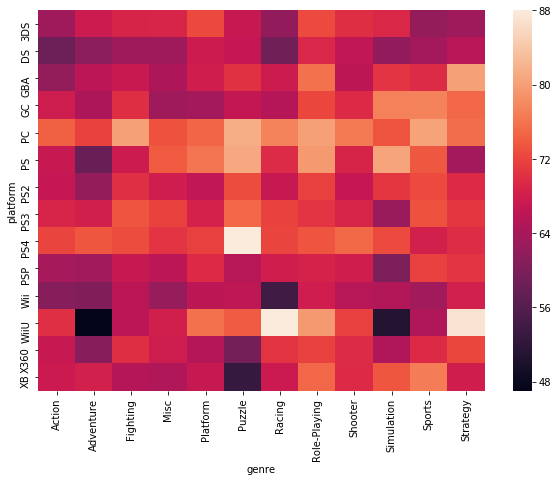

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(platform_critic_score_mean)

По тепловой карте и самой сводной таблице видно, что средние значения рейтинга пользователей для каджой приставки не сильно отличаются по жанрам. Т.е если взять приставку PS3 то все рейтинги пользователей по разным жанрам отличаются не сильно. Больших провалов нет. Но заполнять пропуски в рейтинге пользователей я буду средними значениями относительно жанра игры.

In [112]:
mean_score_genre=data.groupby('platform')['critic_score'].transform('mean')

In [113]:
mean_score_genre.isnull().sum()

1118

In [114]:
data['critic_score'].fillna(mean_score_genre,inplace=True)

In [115]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,70.382927,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.616812,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,70.791667,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,67.372146,NaN,NaN


In [116]:
data.query('platform=="NES"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN
124,The Legend of Zelda,NES,1986.0,Action,3.74,0.93,1.69,0.14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5858,Famista '91,NES,1990.0,Sports,0.00,0.00,0.30,0.00,NaN,NaN,NaN
6139,Famista '92,NES,1991.0,Sports,0.00,0.00,0.28,0.00,NaN,NaN,NaN
10290,Final Fantasy I & II,NES,1994.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
12022,Teenage Mutant Ninja Turtles: Tournament Fighters,NES,1992.0,Fighting,0.04,0.01,0.02,0.00,NaN,NaN,NaN


In [117]:
data.query('platform=="GB"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
30,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,5.89,5.04,3.12,0.59,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11834,Mega Man Xtreme,GB,2000.0,Platform,0.00,0.00,0.07,0.00,NaN,NaN,NaN
11847,Mega Man Xtreme 2,GB,2001.0,Platform,0.00,0.00,0.07,0.00,NaN,NaN,NaN
11982,Metal Gear Solid,GB,2000.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12143,Power Pro GB,GB,1998.0,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN


In [118]:
data.dropna(subset=['critic_score'],inplace=True)

In [119]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,70.382927,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.616812,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,70.791667,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,67.372146,NaN,NaN


In [120]:
data['user_score'].isnull().sum()

5581

In [121]:
null_user_score=data[data['user_score'].isnull()]

In [122]:
null_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,63.761506,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,63.761506,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,6.06,3.90,5.38,0.50,67.372146,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,63.761506,NaN,NaN
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,72.091270,NaN,NaN


In [123]:
user_score_without_null=data.fillna(0)

In [124]:
user_score_without_null['user_score'].value_counts()

0      5581
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.6       2
1.5       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [125]:
tbd=user_score_without_null.query('user_score=="tbd"')

In [126]:
hist_tbd=tbd['genre'].value_counts()

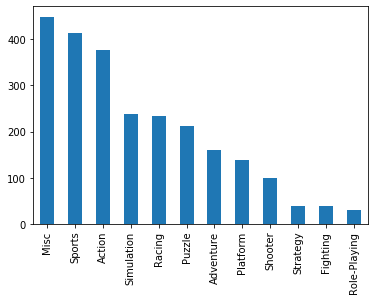

In [127]:
hist_tbd.plot(kind="bar")

Значение tbd присутствует во всех жанрах.

In [128]:
data['user_score']=data['user_score'].replace('tbd','Nan') 
# Заменяю tbd на nan

In [129]:
data['user_score'].isna().sum()

5581

In [131]:
data['user_score']=data['user_score'].astype('float64') # Меняю тип данных на вещественный

In [133]:
platform_user_score_mean=data.groupby('platform')['user_score'].transform('mean')
# !!! возпользуюсь groupby и transform для создания таблицы со средними значениями по значениям в groupby

In [134]:
data['user_score'].fillna(platform_user_score_mean,inplace=True)
# !!! Делаю замену nan на значения соответствующих конкретной платформе средним значением

In [135]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,63.761506,7.025194,NaN
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.000000,8.600000,E
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.000000,7.700000,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.000000,6.300000,E


In [137]:
data['user_score'].isna().sum()

0

Пропусков нет!!!

In [138]:
data['rating'].isna().sum()

5646

In [139]:
data['rating'].value_counts()
# !!! Возрастные ограничения

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Не понимаю, что за значение K-A. Думаю его удалить, т.к. их всего 3

In [140]:
data=data.query('rating!="K-A"') # data без значения "K-A"

In [141]:
data[data['rating'].isna()].head() # значения столбца rating c nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,63.761506,7.025194,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,63.761506,7.025194,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,6.06,3.90,5.38,0.50,67.372146,7.676863,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,63.761506,7.025194,NaN
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,72.091270,6.748249,NaN


In [142]:
#data['rating']=data['rating'].fillna(0)

In [143]:
without_nan_rating=data.dropna() #делаю датасет без nan в rating

In [144]:
# Функция находит в строке платформу и определяет самое популярное возрастное ограничение в зависимости от жанра в данной платформе 
# и выплевывает название
def what_genre_best_in_platform(row):
    platform_for_group=row['platform']
    data_rating=without_nan_rating.loc[without_nan_rating['platform']==platform_for_group]
    grouped=data_rating.groupby('rating')['genre'].count().sort_values(ascending=False)
   
    return grouped.index[0]




In [145]:
data['rating_new']=data.apply(what_genre_best_in_platform,axis=1) #скармливаю data функции what_genre_best_in_platform и записываю в столбец data['rating_new']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
data['rating']=data['rating'].fillna(data['rating_new'])# Заменяю nan на данные из data['rating_new']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
del data['rating_new'] # Удаляю ненужный столбец

In [148]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


In [149]:
data['rating'].isnull().sum() 

0

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15592 entries, 0 to 16714
Data columns (total 11 columns):
name               15592 non-null object
platform           15592 non-null object
year_of_release    15592 non-null float64
genre              15592 non-null object
na_sales           15592 non-null float64
eu_sales           15592 non-null float64
jp_sales           15592 non-null float64
other_sales        15592 non-null float64
critic_score       15592 non-null float64
user_score         15592 non-null float64
rating             15592 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Вывод :

Проведя работу по заполнению данных были пропуски в столбце name. Их мало и данные по 1993 году. Самое начало игр, возможно просто что-то малоизвестное и данных действительно уже не найти. Просто удалил.
Пропуски по годам релиза я заполнил медианных значением в зависимости от платформы. 
Пропуски по rating я заполнил через функцию, которая проверяет самое популярное значение рейтинга по жарну и через apply заполняю пропуски.
Пропуски по пользовательским рейтинга и рейтингам критиков я взял среднее значение.


### Посчитаю суммарные продажи во всех регионах

In [151]:
data['na_sales_sum']=data['na_sales'].sum()
# !!! Столбец с суммарной продажей в С.Америке

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
data['eu_sales_sum']=data['eu_sales'].sum()
# !!! Столбец с суммарной продажей в Европе

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
data['jp_sales_sum']=data['jp_sales'].sum()
# !!! Столбец с суммарной продажей в Японии

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,na_sales_sum,eu_sales_sum,jp_sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,3845.91,2282.91,922.77
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,3845.91,2282.91,922.77
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,3845.91,2282.91,922.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,3845.91,2282.91,922.77
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,3845.91,2282.91,922.77


In [155]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
# Создаю столбец с суммарной продажей игры во всех регионах 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,na_sales_sum,eu_sales_sum,jp_sales_sum,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,3845.91,2282.91,922.77,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,3845.91,2282.91,922.77,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,3845.91,2282.91,922.77,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,3845.91,2282.91,922.77,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,3845.91,2282.91,922.77,28.91


In [160]:
del data['na_sales_sum']
del data['eu_sales_sum']
del data['jp_sales_sum']

In [161]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Изменение типа данных

In [157]:
data['year_of_release']=data['year_of_release'].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
data['user_score']=data['user_score'].astype('float64') # Меняю тип данных на вещественный

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15592 entries, 0 to 16714
Data columns (total 15 columns):
name               15592 non-null object
platform           15592 non-null object
year_of_release    15592 non-null int64
genre              15592 non-null object
na_sales           15592 non-null float64
eu_sales           15592 non-null float64
jp_sales           15592 non-null float64
other_sales        15592 non-null float64
critic_score       15592 non-null float64
user_score         15592 non-null float64
rating             15592 non-null object
na_sales_sum       15592 non-null float64
eu_sales_sum       15592 non-null float64
jp_sales_sum       15592 non-null float64
all_sales          15592 non-null float64
dtypes: float64(10), int64(1), object(4)
memory usage: 1.9+ MB


## Исследовательский анализ

Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

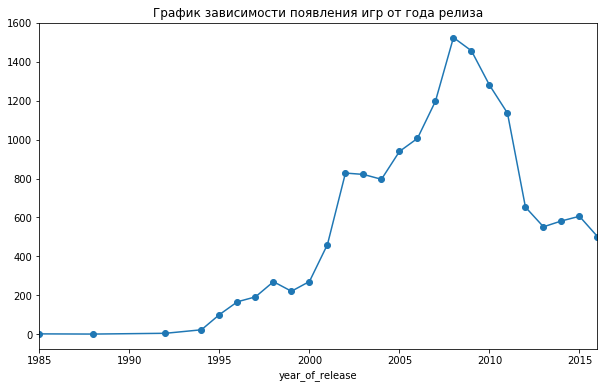

In [162]:
data.groupby('year_of_release')['name'].count().plot(x="year_of_release",style="-o",figsize=(10,6),title='График зависимости появления игр от года релиза')


Из графика видно, что игр до 1995 года почти не выходило. Их очень мало. Поэтому данные с 1985-1995 г не важны. Затем был резкий рост до 2009. После пошел такой же спад. В 2016 году количество выпускаемых игр на уровне 2001 года.

Посмотреть, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [163]:
best_saler_platform=data.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc=('sum'))
# Создаю сводный дата сет по платформам и продажам по регионам

In [164]:
best_saler_platform['all_sales']=best_saler_platform['na_sales']+best_saler_platform['eu_sales']+best_saler_platform['jp_sales']+best_saler_platform['other_sales']
# Делаю в дата сете еще столбец, в котором сумма по всем регионам.

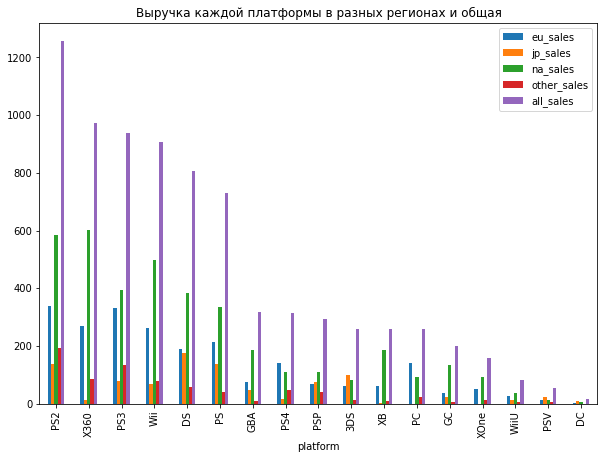

In [165]:
best_saler_platform.sort_values(by='all_sales',ascending=False).plot(kind='bar',figsize=(10,7),title='Выручка каждой платформы в разных регионах и общая')

Из графика явно видно, что топ выручки у платформ PS2,X360,PS3,Wii,DS,PS. 

In [181]:
data_plat=data.pivot_table(index="platform",columns='year_of_release',values='all_sales',aggfunc=('sum'))
#сводная таблица платформ по годам. 


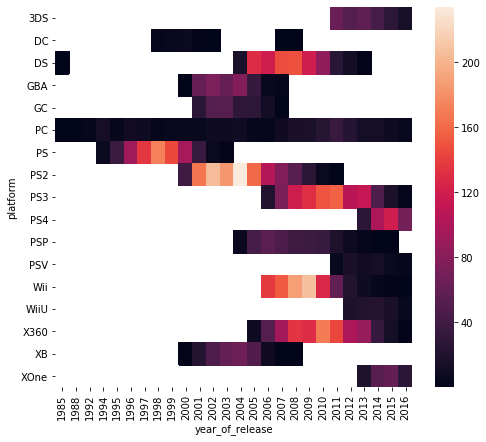

In [182]:
plt.figure(figsize=(8,7))
sns.heatmap(data_plat)

Приведена тепловая карта всех приставок с 1985 по 2016.
По тепловой карте можно увидеть платформы у которых один производитель, и как платформы приходят на замену старым. Например можно увидеть "лестницу" производителя Nintendo со своими платформами: GBA(не уверен),DS,3DS. Производителя Sony с платформами: ps,ps2,ps3,ps4. это явные производители из нескольких платформ.

In [183]:
list_platform=['PS2','X360','PS3','Wii','DS','PS'] # Список top платформ 

In [184]:
top_platform=data_plat.query('platform in @list_platform') # срез по top платформам

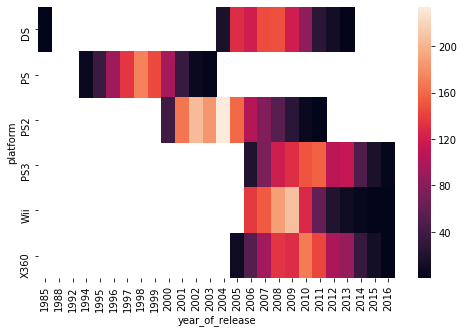

In [185]:
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

Платформы с наибольшими суммарными продажами и распределение по годам

По тепловой карте видно, что платформа в среднем живет 10-12 лет. Пик продаж приходит в среднем через 5-6 лет, т.е. в самой середине срока жизни. Компания PS начинает релиз новой платформы примерно через это время, когда начинается спад у предыдущей. Интересный год 2004. На рынок вернулась платформа DS. В 2006 появились новые платформы, которые завоевали популярность. Как раз в тот момент, когда продажи PS2 стали падать и когда запустили новую PS3. Платформа Wii с первого года имела высокие продажи. Но постепенно ее продажи стали падать и падают до сих пор. Печаль.

In [192]:
actual_data=data.query('year_of_release>=2008')
#  Срез по году. Принимаю, что для анализа игр на 2017 год принимаю актуальные года с 2005 года.

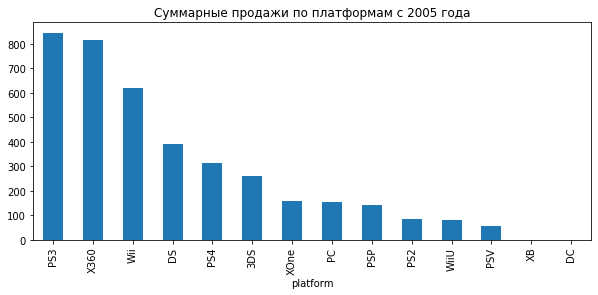

In [193]:
actual_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar",title='Суммарные продажи по платформам с 2005 года')

In [197]:
list_platform=['3DS','PS3','PS4','X360','XOne'] # Список активных платформ 

In [198]:
top_platform=data_plat.query('platform in @list_platform') # срез по акривным платформам

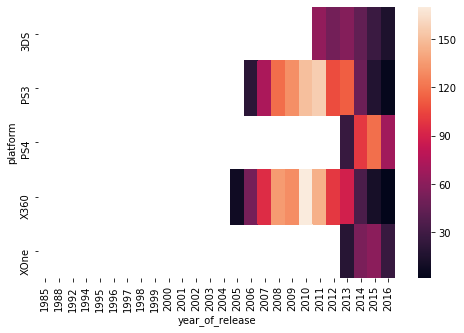

In [199]:
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

Выше прадставлен график активных платформ за актуальный период. По нему видно, что Актуальной платформой можно назвать PS4. Продажи ее только-только начинают падать. Это значит, что примено через год будет выходить новая платформа. 

Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат

In [201]:
actual_data=data.query('platform in @list_platform and year_of_release>=2008')
#Дата сет с активными платформами и актуальным периодом

In [203]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.000000,6.300000,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,72.091270,6.748249,T,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,70.382927,6.726568,T,0.00
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,67.101190,6.831609,E,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,67.101190,6.831609,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,70.382927,6.726568,T,0.01


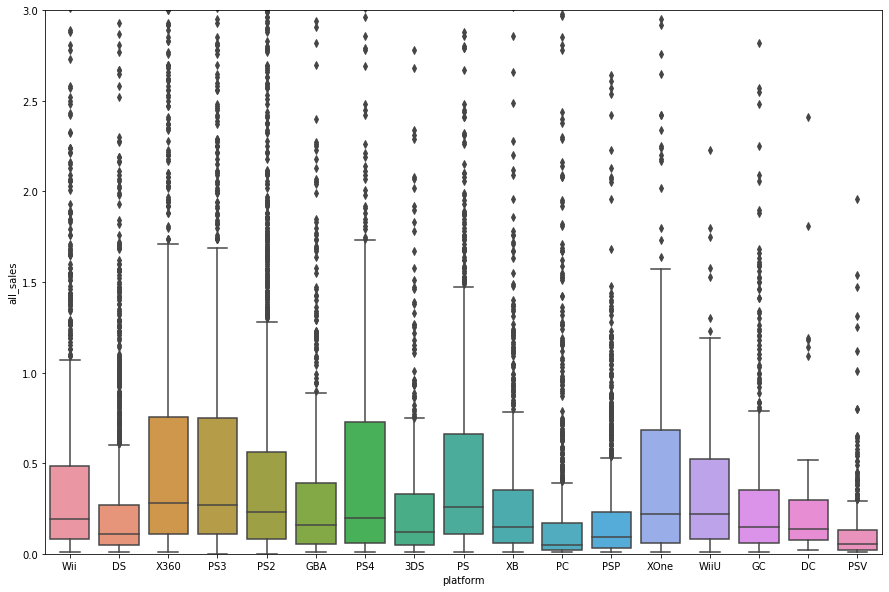

In [92]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='all_sales',data=data)

Межквартальный размах очень похож у платфором X360, PS3, PS4, PS, XOne. У них примерно одинаковая медиана около 0.28 млн. 3 квартиль заканчивается примерно 0.7 млн. Все распрадаления платформ скошены вправо. Можно сказать, что у всех ящиков медина лежит левее среднего значения.
У компаний, у которых пользовательский интерес ниже имеют медину (второй квартиль) около 0.1-0.2. 

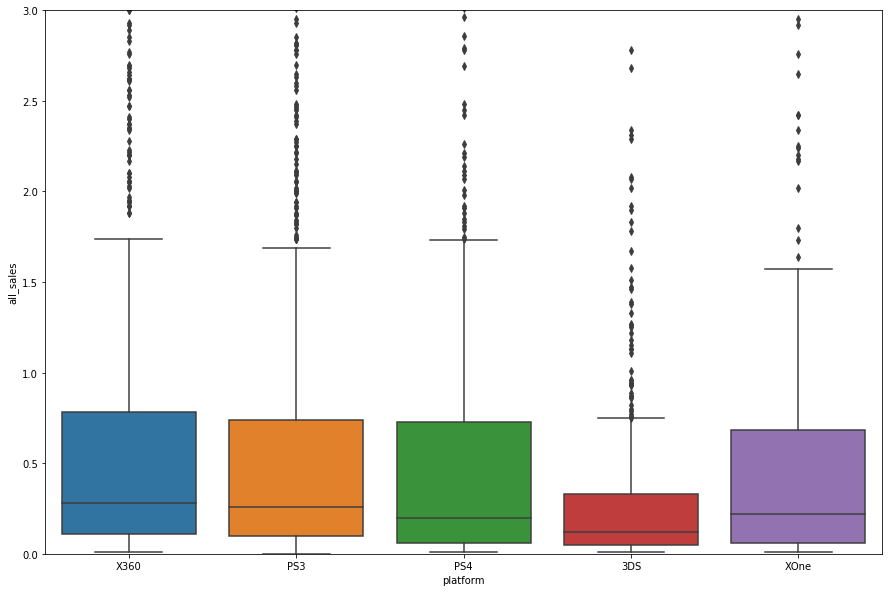

In [204]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='all_sales',data=actual_data)

Диаграмма размаха по глобальным продажам каждой игры и разбивкой по платформам



Анализируя ящик с усами можно увидеть, что они похожи. за исключением платформы 3DS. У нее третий квартиль меньшем у остальных. Можно сказать, что медиана продаж у этих платформ почти одинакова. Они все скошены вправо. 

In [208]:
mean_sales=actual_data.groupby('platform')['all_sales'].mean().sort_values(ascending=False)
# Средние значания глобальных продаж каждой игры и разбивкой по платформам

In [209]:
median_sales=actual_data.groupby('platform')['all_sales'].median().sort_values(ascending=False)
# Медианные значания глобальных продаж каждой игры и разбивкой по платформам

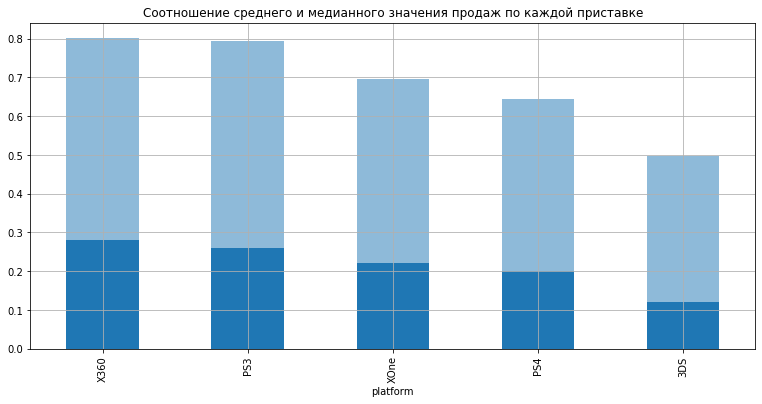

In [210]:
ax=mean_sales.plot(y='platform',figsize=(13,6),kind='bar',label='mean',alpha=0.5)
median_sales.plot(y='platform',grid=True,figsize=(13,6),kind='bar',label='median',ax=ax,title="Соотношение среднего и медианного значения продаж по каждой приставке")


Медианные значения сильно отличаются от средних. Везде медиана ниже среднего. Как и было сказано ниже, медиана лежит левее среднего. По гисторгамме видно, что на мадиана меньше среднего в несколько раз. 

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

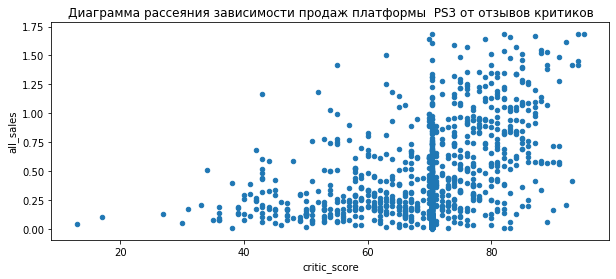

In [96]:
actual_data.query('platform=="PS3" and all_sales<=1.7').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов критиков')


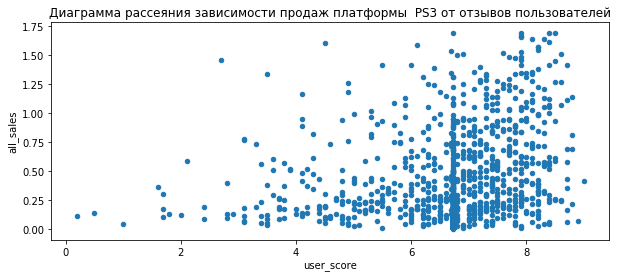

In [97]:
actual_data.query('platform=="PS3" and all_sales<=1.7').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов пользователей')


По этим графикам видно, что есть зависимость между оценкой критиков и пользователей, но не такая большая. Чем больше балл, там больше продажи. Положительная корреляция. Плотнее всего с оценками пользователей в районе от 6-8 баллов с продажами до 0.5 млн. Что касается оценки критиков, то у них плотнее всего в районе от 65-75 баллов и до 0.50 млн. Так же как и у пользователей. У критиков в района 70 баллов замечена плотная вертикальная линия. В ней скорее всего будет среднее значение. У пользователей ее можно увидеть в района 0.68

In [98]:
ps3_actual=actual_data.query('platform=="PS3" and all_sales<=1.7')

In [99]:
ps3_actual['all_sales'].corr(ps3_actual['user_score'])
# Корреляция Пирсона между продажами и отзывами пользователей 

0.2218373255069728

In [100]:
ps3_actual['all_sales'].corr(ps3_actual['critic_score'])
# Корреляция Пирсона между продажами и отзывами критиков 

0.37952288690856156

По данным корреляции можно сделать вывод, что зависимость между продажами и отзывами критиков есть, но ниже средней. Корреляция положительная. Чем лучше отзыв критика, тем выше продажи. Отзывы пользователей не так сильно вляют на продажи. Корреляция слабая.  



### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [101]:
median_sale_genre=actual_data.groupby('genre')['all_sales'].median().sort_values(ascending=False)
count_genre=actual_data.groupby('genre')['all_sales'].count().sort_values(ascending=False)


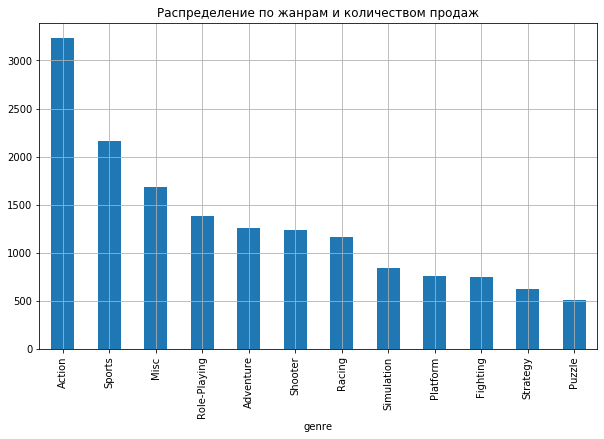

In [102]:
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Распределение по жанрам и количеством продаж')

Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре puzzle, strategy. Разница в количестве продаж почти в 6,5 раз. Следом по популярности идет жанр Sport

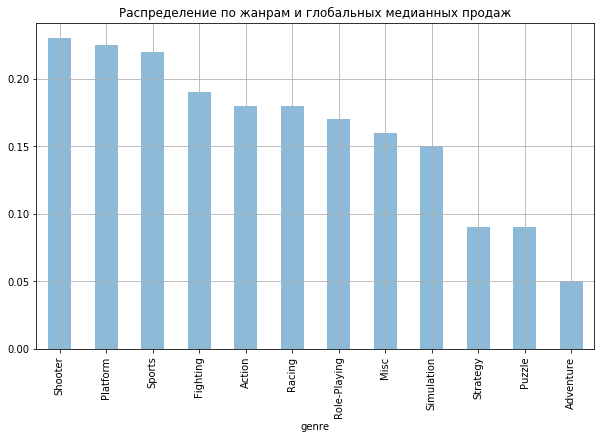

In [103]:
median_sale_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.5,title='Распределение по жанрам и глобальных медианных продаж')

Что касается выручки от продаж, то тут можно сказать, что самым высоким является жанр shooter, platform, sport. Тогда как самый покупаемый жанр Action немного ниже. Меньше всего выручки у жанра Adventure.




## Составьте портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). Описать различия в долях продаж

In [104]:
na_sales_platform=actual_data.pivot_table(index='platform',values=['na_sales','all_sales'],aggfunc=('sum'))

In [105]:
na_sales_platform=na_sales_platform.sort_values(by='na_sales',ascending=False).head(5)
na_sales_platform
# Топ 5 продаж платформ в Северной Америке

,all_sales,na_sales
platform,,
X360,971.42,602.47
PS2,1255.77,583.84
Wii,907.51,496.90
PS3,939.65,393.49
DS,806.10,382.40


Самая популярная платформа в С. Америке- X360, затем PS2 c небольшой разницей.  PS3 на четвертом месте.

In [106]:
na_sales_platform['% sales']=na_sales_platform['na_sales']/na_sales_platform['all_sales']

# Посчитали долю продаж

In [107]:
eu_sales_platform=actual_data.pivot_table(index='platform',values=['eu_sales','all_sales'],aggfunc=('sum'))

In [108]:
eu_sales_platform=eu_sales_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_platform
# Топ 5 продаж платформ в Европе

,all_sales,eu_sales
platform,,
PS2,1255.77,339.29
PS3,939.65,330.29
X360,971.42,270.76
Wii,907.51,262.21
PS,728.95,213.45


Самая популярная платформа в Европе- PS2, затем PS3. На 3 месте X360. PS на 5 месте.

In [109]:
eu_sales_platform['% sales']=eu_sales_platform['eu_sales']/eu_sales_platform['all_sales']

# Посчитали долю продаж

In [110]:
jp_sales_platform=actual_data.pivot_table(index='platform',values=['jp_sales','all_sales'],aggfunc=('sum'))

In [111]:
jp_sales_platform=jp_sales_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_platform
# Топ 5 продаж платформ в Японии

,all_sales,jp_sales
platform,,
DS,806.10,175.55
PS2,1255.77,139.20
PS,728.95,138.36
3DS,259.00,100.67
PS3,939.65,80.19


Самая популярная платформа в Японии DS, затем PS3. На 3 месте X360. PS на 5 месте.

In [112]:
jp_sales_platform['% sales']=jp_sales_platform['jp_sales']/jp_sales_platform['all_sales']

# Посчитали долю продаж

Рассматривая все три региона можно выделить, что в топ платформ везде присутствуют PS, PS2, PS3.

#### Круговая диаграмма доли продаж по na, eu, jp:

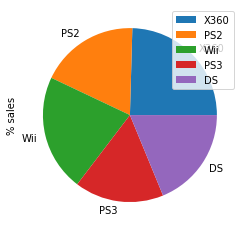

In [113]:
na_sales_platform.plot(kind='pie',y="% sales")

В С. Америке платформа X360 имеет четверть всех продаж этой платформы. PS2 и PS3 доля всех продаж этих платформ около 30%. Также почти четверть всех продаж у платформы Wii 

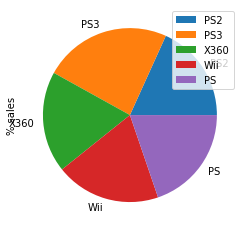

In [114]:
eu_sales_platform.plot(kind='pie',y="% sales")

В Европе четверть продаж имеет платформа PS3 от суммы всех продаж этой платформы. Доли продаж X360, PS, PS2 почти одинаковы и составляют около 30%.   

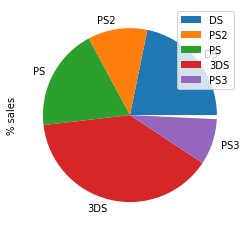

In [115]:
jp_sales_platform.plot(kind='pie',y="% sales")

В Японии платформа 3DS самая популярная и в этом регионе имеет самую большую долю продаж. Полный рекордсмен. PS и DS почти одинаковы около 30%

### Самые популярные жанры (топ-5). Пояснить разницу.

In [116]:
na_sales_genre=actual_data.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))

In [117]:
na_sales_genre=na_sales_genre.sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre
# Топ 5 жанров в Северной Америке

,na_sales
genre,
Action,806.33
Sports,643.70
Shooter,521.48
Misc,389.89
Racing,317.86


Самый популярный жанр в С. Америке- это Action. Затем Sport и Shooter

In [118]:
eu_sales_genre=actual_data.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))

In [119]:
eu_sales_genre=eu_sales_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre
# Топ 5 жанров в Европе

,eu_sales
genre,
Action,503.81
Sports,366.91
Shooter,309.40
Racing,223.86
Misc,208.25


В Европе самые популярные жанры такие же как и в С. Америке 

In [120]:
jp_sales_genre=actual_data.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))

In [121]:
jp_sales_genre=jp_sales_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre
# Топ 5 жанров в Японии

,jp_sales
genre,
Role-Playing,264.15
Action,142.24
Sports,91.56
Misc,90.60
Platform,58.34


В Японии ситуация другая. На первом месте Role-Playing и имеет очень большое преимущество по сравнению с остальными. Потом Action и Sport.

#### Круговая диаграмма жанров по na, eu, jp:

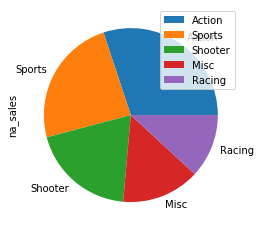

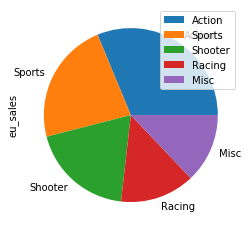

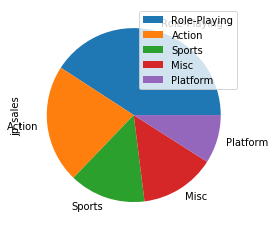

In [122]:
na_sales_genre.plot(kind='pie',y="na_sales")
eu_sales_genre.plot(kind='pie',y="eu_sales")
jp_sales_genre.plot(kind='pie',y="jp_sales")

Во всех регионах самыми популярными являются жанры Action, Sport, Misc. В Японии плюс к ним очень высокой популярностью пользуется жанр Role-Playing.  

###  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [123]:
na_sales_ESRB=actual_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))

In [124]:
na_sales_ESRB=na_sales_ESRB.sort_values(by='na_sales',ascending=False)
na_sales_ESRB
# Соотношение рейтинга ESRB и продаж в Северной Америке

,na_sales
rating,
E,1767.10
T,951.64
M,763.09
E10+,360.03
EC,1.53
AO,1.26
RP,0.00


In [125]:
eu_sales_ESRB=actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))

In [126]:
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB
# Соотношение рейтинга ESRB и продаж в Европе

,eu_sales
rating,
E,986.33
T,609.29
M,492.27
E10+,192.51
AO,0.61
EC,0.11
RP,0.08


In [127]:
jp_sales_ESRB=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))

In [128]:
jp_sales_ESRB=jp_sales_ESRB.sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB
# Соотношение рейтинга ESRB и продаж в Японии

,jp_sales
rating,
E,504.06
T,311.36
M,64.29
E10+,43.04
AO,0.00
EC,0.00
RP,0.00


Строю гистограммы рейтингов по разным регионам:

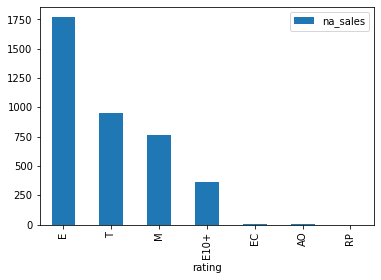

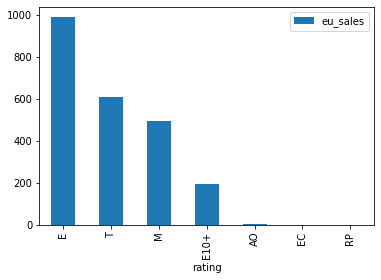

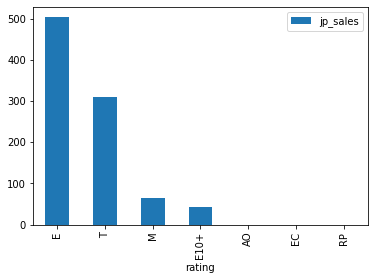

In [166]:
na_sales_ESRB.plot(kind='bar') # гисторгамма продаж по возрастных ограничений для С. Америки
eu_sales_ESRB.plot(kind='bar') # гисторгамма продаж по возрастных ограничений для Европы
jp_sales_ESRB.plot(kind='bar') # гисторгамма продаж по возрастных ограничений для Японии

Самые популярные возрастные ограничения в С. Америке, Европе, Японии- E, T, M, E10+. Больше всего E (Для всех), затем T (для подростков 13-19 лет). Категории M (от 17) и Е+10 (10+) в Японии гораздо меньше чем в остальных регионах. Ну по сути это таже самая категория T. Остальных ограничения очень мало. 
Можно сделать вывод, что возрастное ограничение влияет на продажи. Т.е выпуская новый продукт нужно понимать, что большей популярностью пользуются продукты с возрастным ограничением во всех регионах E (Для всех) или T(для подростков 13-19 лет). По сути категория М и Е10+ это таже самая что и Т. Т.е можно считать, что категория Е и Т почти равны.

Анализируя будующие продажи на 2017 год можнос уверенностью сказать, что хорошие продажи можно получить у платформ '3DS','PS3','PS4','X360','XOne'. Также обратить внимание на появление новой платформы PS. Что касается жанров, то тут самые продаваемые Action, Sport, Shooter с ориентацией для подростков от 13-19 лет. 

### Проверка гипотезы:

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC равны.
#### Альтернативная гипотеза:  cредний пользовательский рейтинг платформы XOne и PC не равны.

In [130]:
XOne_data=actual_data.query('platform=="XOne"')

In [131]:
PC_data=actual_data.query('platform=="PC"')

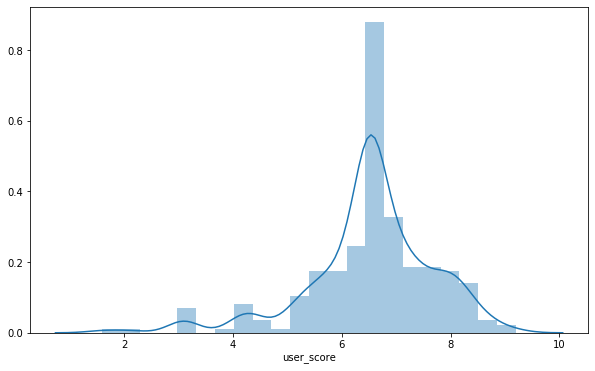

In [132]:
plt.figure(figsize=(10,6))
sns.distplot(XOne_data['user_score'])

 Диаграмма распределения значений пользовательского рейтинга для платформы XOne

In [133]:
mean_XOne=XOne_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы XOne:',mean_XOne)
# Среднее значение пользовательских рейтингов для платформы XOne

Среднее значение пользовательского рейтинга платформы XOne: 6.521428571428572


In [134]:
variance_XOne=np.var(XOne_data['user_score'],ddof=1)
print('Дисперсия для платформы XOne:',variance_XOne)

Дисперсия для платформы XOne: 1.4031155632984902


In [135]:
standart_deviation_XOne=np.sqrt(variance_XOne)
print('Стандартное отклонение для платформы XOne:',standart_deviation_XOne)

Стандартное отклонение для платформы XOne: 1.1845317907504593


In [136]:
st_interval_XOne=st.t.interval(0.95, len(XOne_data['user_score'])-1, loc=np.mean(XOne_data['user_score']), scale=st.sem(XOne_data['user_score']))

In [137]:
print('Доверительный 95% интервал для пользовательского рейтинга платформы XOne:',st_interval_XOne)

Доверительный 95% интервал для пользовательского рейтинга платформы XOne: (6.372975828799924, 6.66988131405722)


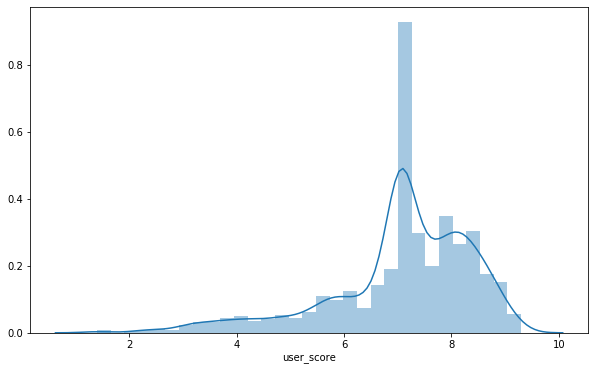

In [138]:
plt.figure(figsize=(10,6))
sns.distplot(PC_data['user_score'])

Диаграмма распределения значений пользовательского рейтинга для платформы PC

In [139]:
mean_PC=PC_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы XOne:',mean_PC)
# Среднее значение пользовательских рейтингов для платформы XOne

Среднее значение пользовательского рейтинга платформы XOne: 7.064552856469958


In [140]:
variance_PC=np.var(PC_data['user_score'],ddof=1)
print('Дисперсия для платформы PC:',variance_PC)

Дисперсия для платформы PC: 1.8347502227581234


In [141]:
standart_deviation_PC=np.sqrt(variance_PC)
print('Стандартное отклонение для платформы PC:',standart_deviation_PC)

Стандартное отклонение для платформы PC: 1.3545295208145607


In [142]:
st_interval_PC=st.t.interval(0.95, len(PC_data['user_score'])-1, loc=np.mean(PC_data['user_score']), scale=st.sem(PC_data['user_score']))
print('Доверительный 95% интервал для пользовательского рейтинга платформы PC:',st_interval_PC)


Доверительный 95% интервал для пользовательского рейтинга платформы PC: (6.978983449015709, 7.150122263924207)


Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC равны.

In [143]:
alpha=.05 #Статистическая значимость

In [144]:
result=st.ttest_ind(XOne_data['user_score'],PC_data['user_score'],equal_var=False) 
# проверяем равенство двух независимых совокупностей. Значения дисперсий разные, поэтому equal_var=False

In [145]:
print('Значение p-value:', result.pvalue)

Значение p-value: 1.0728965409834441e-09


In [146]:
if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу не удалось')

Отвергаем нулевую гипотезу


Нулевую гипотеза отвергнута. Средние значения двух генеральных выборок пользовательских рейтингов платформы XOne и PC  не равны

#### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [147]:
action_data=actual_data.query('genre=="Action"')

In [148]:
mean_action=action_data['user_score'].mean()
print('Среднее значение жанра Action пользовательского рейтинга:',mean_action)

Среднее значение жанра Action пользовательского рейтинга: 7.100792438373186


In [149]:
variance_action_data=np.var(action_data['user_score'],ddof=1)

In [150]:
print('Дисперсия жанра Action пользовательского рейтинга:',variance_action_data)

Дисперсия жанра Action пользовательского рейтинга: 1.2215830159171595


In [151]:
standart_deviation_action=np.sqrt(variance_action_data)
print('Стандартное отклонение жанра Action пользовательского рейтинга:',standart_deviation_action)

Стандартное отклонение жанра Action пользовательского рейтинга: 1.1052524670486645


In [152]:
st_interval_action=st.t.interval(0.95, len(action_data['user_score'])-1, loc=np.mean(action_data['user_score']), scale=st.sem(action_data['user_score']))
print('Доверительный 95% интервал для пользовательского рейтинга жанра Action:',st_interval_action)


Доверительный 95% интервал для пользовательского рейтинга жанра Action: (7.06267386587275, 7.138911010873622)


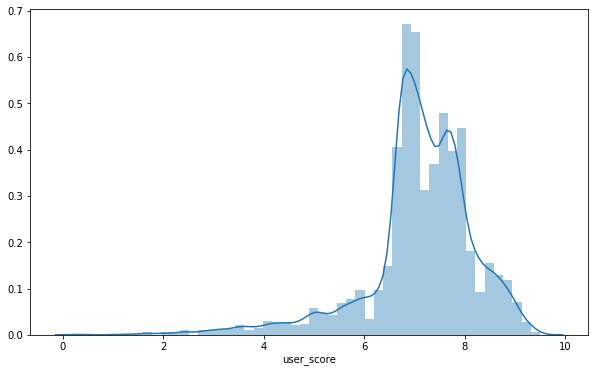

In [153]:
plt.figure(figsize=(10,6))
sns.distplot(action_data['user_score'])

Диаграмма распределения значений пользовательского рейтинга для Action

In [154]:
sport_data=actual_data.query('genre=="Sports"')

In [155]:
mean_sport=sport_data['user_score'].mean()
print('Среднее значение жанра Sport пользовательского рейтинга:',mean_sport)

Среднее значение жанра Sport пользовательского рейтинга: 7.131215477857191


In [156]:
variance_sport_data=np.var(sport_data['user_score'],ddof=1)

In [157]:
print('Дисперсия жанра Sport пользовательского рейтинга:',variance_sport_data)

Дисперсия жанра Sport пользовательского рейтинга: 1.4566381179574686


In [158]:
standart_deviation_sport=np.sqrt(variance_sport_data)
print('Стандартное отклонение жанра Sport пользовательского рейтинга:',standart_deviation_sport)

Стандартное отклонение жанра Sport пользовательского рейтинга: 1.2069126389086613


In [159]:
st_interval_sport=st.t.interval(0.95, len(sport_data['user_score'])-1, loc=np.mean(sport_data['user_score']), scale=st.sem(sport_data['user_score']))
print('Доверительный 95% интервал для пользовательского рейтинга жанра Sport:',st_interval_sport)


Доверительный 95% интервал для пользовательского рейтинга жанра Sport: (7.080336499176626, 7.182094456537756)


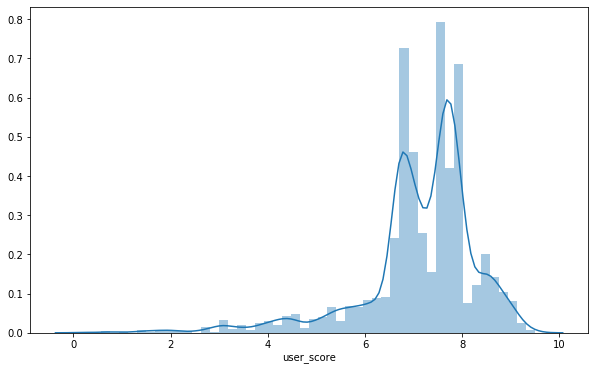

In [160]:
plt.figure(figsize=(10,6))
sns.distplot(sport_data['user_score'])

Нулевая гипотеза: cредний пользовательский рейтинг Action и Sports равны.
Альтернативная гипотеза: cредний пользовательский рейтинг Action больше Sports.

In [161]:
alpha=.05 # Статистическая значимость 

In [162]:
interested_value=mean_action # среднее значение Action. С ним будем сравнивать среднее выборки Sports

In [163]:
result=st.ttest_1samp(sport_data['user_score'],interested_value) # ttest для проверки 

In [164]:
print('p-value:',result.pvalue)

p-value: 0.2410794120235863


In [165]:
if (result.pvalue/2<alpha) and (mean_sport<=interested_value):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Не удалось отвергнуть нулевую гипотезу


Действительно cредний пользовательский рейтинг Action и Sports равны со статистической значимостью alpha=5%.

#### Как сформулировал нулевую и альтернативную гипотезы?

Для формулирования нулевой гипотезы я применил функцию ttest_ind. Сравнивая среднее двух совокупностей и формулированияе нулевой гипотезы, я эти совокупности приравнял затем сравнивал со статистический значимостью. Я сформулировал двустороннюю гипотезу. Значение статистической значимости я задал 5%. Соответственно для альтернативной гипотезы дело было наоборот. Т.е наши совокупности не равны.

Когда я сравнивал между собой совокупности, , утверждая в гипотезе, что одна совокупность больше или меньше другой, то я формулировал Одностироннюю гипотезу. Тут сравнивая совокупность со значением среднего я применял функцию ttest_1samp. 
Генеральной гипотезой также было их равенство, а альтернативной гипотезой было утверждение, что одна совокупность больше другой. Сравнение pvalue, которое выдавала функция происходило со статистической значимостью =5%. 